In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

In [12]:
path = r"C:\Users\XT286AX\OneDrive - EY\Desktop\deposito__Montresori\datasets\Mall_Customers.csv"

df = pd.read_csv(path)
X = df.drop(["CustomerID", "Genre", "Age"], axis=1)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


c:\Users\XT286AX\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\XT286AX\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\XT286AX\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\XT286AX\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:14

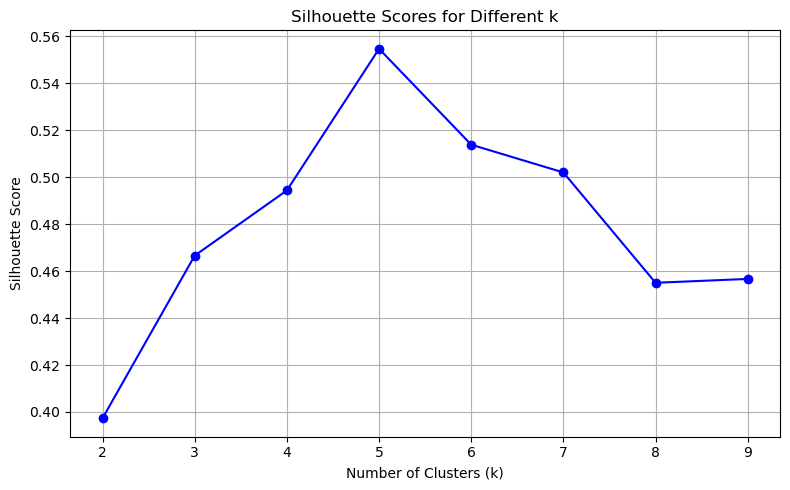

In [ ]:
X_scaled = StandardScaler().fit_transform(X)

silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)


plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='blue')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\XT286AX\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


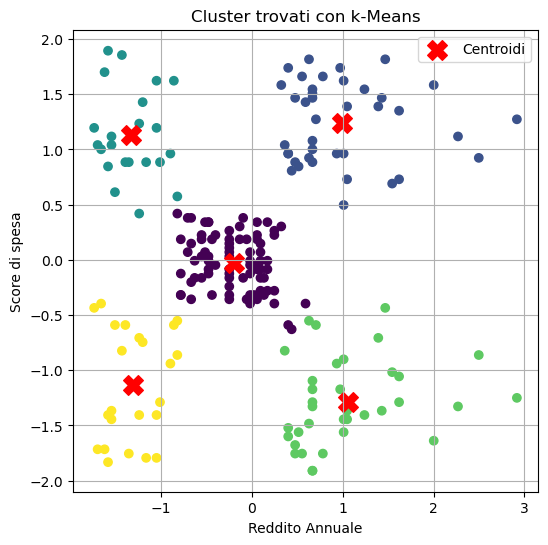

In [ ]:
# PLOTTA IL CLUSTER CON IL MIGLIORE K ED EVIDENZIA I CENTROIDI

kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(6, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroidi')
plt.title("Cluster trovati con k-Means")
plt.xlabel("Reddito Annuale")
plt.ylabel("Score di spesa")
plt.legend()
plt.grid(True)
plt.show()

Ho inteso il dataset come una raccolta di dati su clienti di una azienda venditrice di prodotti, per ogni cliente è possibile sapere il reddito medio annuale e il suo speding score.

I 5 cluster sono divisi in:
-  **Gialli** con basso reddito e basso spending score.
-  **Verdi** con alto reddito e basso spending score, indicativo ad esempio di alto tasso di risparmio
-  **Viola** con medio reddito e medio spending score
-  **Blu chiaro** con basso reddito e alto spending score, ad esempio indicatore di indebitamento, mancata dichiarazione di parte dei redditi eccetera.
-  **Blu scuro** con alto reddito e altro spending score, spending score che comunque non risulta maggiore di quello ad esempio del cluster blu chiaro.

I cluster che sono più "spiegabili" razionalmente sonon quelli in mezzo alla bisettrice del grafico (giallo, viola e blu) dove le risorse sono adeguate alla spesa. Invece il cluster blu chiaro indica un comportamento di anomalia di eccessiva spesa rispetto alle risorse mentre il cluster verde un-anomalia nel risparmio.

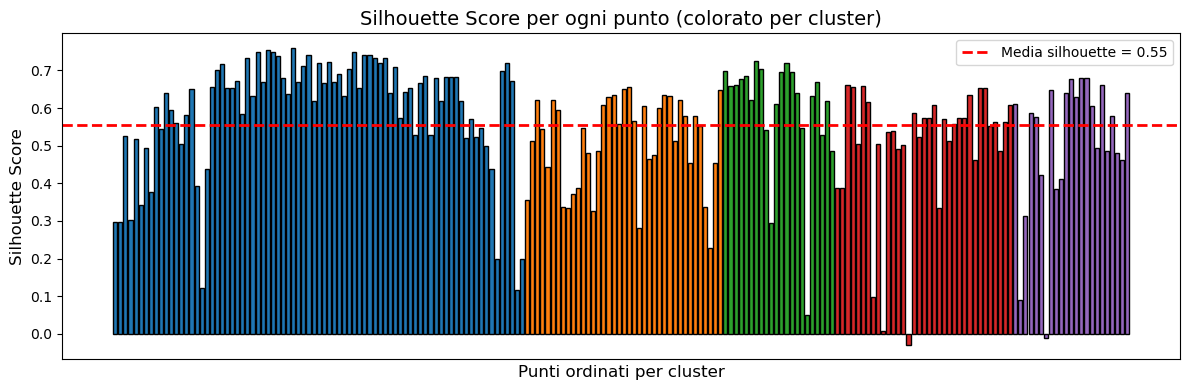

In [ ]:
# VISUALIZZA I SILHOUETTE SCORE PER ONGI PUNTO
sample_silhouette_values = silhouette_samples(X_scaled, labels)
sorted_labels = np.argsort(labels)
sorted_scores = sample_silhouette_values[sorted_labels]
sorted_clusters = labels[sorted_labels]

cluster_colors = {
    0: "#1f77b4",  
    1: "#ff7f0e",  
    2: "#2ca02c",  
    3: "#d62728",
    4: "#9467bd"   
}

bar_colors = [cluster_colors[c] for c in sorted_clusters]

plt.figure(figsize=(12, 4))
plt.bar(range(len(X_scaled)), sorted_scores, color=bar_colors, edgecolor='black')
plt.axhline(silhouette_avg, color='red', linestyle='--', linewidth=2, label=f'Media silhouette = {silhouette_avg:.2f}')
plt.title("Silhouette Score per ogni punto (colorato per cluster)", fontsize=14)
plt.xlabel("Punti ordinati per cluster", fontsize=12)
plt.ylabel("Silhouette Score", fontsize=12)
plt.xticks([])
plt.legend()
plt.tight_layout()
plt.show()